In [2]:
!pip install -U scikit-learn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# modelling
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('data/stud.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [9]:
X=df.drop(columns=['math score'])

In [10]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [11]:
y=df['math score']

In [13]:
pd.DataFrame(y)

,math score
0,72
1,69
2,90
3,47
4,76
...,...
995,88
996,62
997,59
998,68


In [15]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
  [("OneHotEncoder",oh_transformer,cat_features),
   ("StandardScaler",numeric_transformer,num_features)]
)

In [17]:
X=preprocessor.fit_transform(X)

In [18]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate funtion to give all metrics after model training

In [22]:
def evaluate_model(true,predicted):
    r2_square=r2_score(true,predicted)
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    return r2_square, mae, rmse

In [25]:
models={
    "Linear Regression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
    }
model_list=[]
r2_list=[]

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(X_train,y_train)

  # Make Prediction
  y_train_pred=model.predict(X_train)
  y_test_pred=model.predict(X_test)
  
  # evaluate Train and Test Dataset
  model_train_r2,model_train_mae,model_train_rmse = evaluate_model(y_train,y_train_pred)
  model_test_r2,model_test_mae,model_test_rmse = evaluate_model(y_test,y_test_pred)
  
  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])
  
  print("Model performance for Training dataset")
  print("- R2 Score {:.4f}".format(model_train_r2))
  print("- Mean Absolute Error {:.4f}".format(model_train_mae))
  print("- Root Mean Square Error {:.4f}".format(model_train_rmse))
  
  print("Model performance for Test dataset")
  print("- R2 Score {:.4f}".format(model_test_r2))
  print("- Mean Absolute Error {:.4f}".format(model_test_mae))
  print("- Root Mean Square Error {:.4f}".format(model_test_rmse))
  r2_list.append(model_test_r2)
  

Linear Regression
Model performance for Training dataset
- R2 Score 0.8743
- Mean Absolute Error 4.2667
- Root Mean Square Error 5.3231
Model performance for Test dataset
- R2 Score 0.8804
- Mean Absolute Error 4.2148
- Root Mean Square Error 5.3940
Ridge
Model performance for Training dataset
- R2 Score 0.8743
- Mean Absolute Error 4.2650
- Root Mean Square Error 5.3233
Model performance for Test dataset
- R2 Score 0.8806
- Mean Absolute Error 4.2111
- Root Mean Square Error 5.3904
Lasso
Model performance for Training dataset
- R2 Score 0.8071
- Mean Absolute Error 5.2063
- Root Mean Square Error 6.5938
Model performance for Test dataset
- R2 Score 0.8253
- Mean Absolute Error 5.1579
- Root Mean Square Error 6.5197
KNeighbors Regressor
Model performance for Training dataset
- R2 Score 0.8555
- Mean Absolute Error 4.5167
- Root Mean Square Error 5.7077
Model performance for Test dataset
- R2 Score 0.7838
- Mean Absolute Error 5.6210
- Root Mean Square Error 7.2530
Decision Tree Regress

In [26]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
1,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852069
7,CatBoost Regressor,0.851632
8,AdaBoost Regressor,0.845105
6,XGBRegressor,0.827797
2,Lasso,0.825320
3,KNeighbors Regressor,0.783813
4,Decision Tree Regressor,0.727047


### Linear Regression

In [27]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


### plot y_pred and y_test

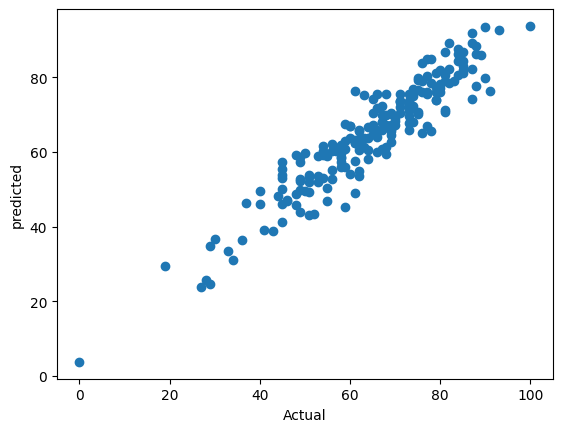

In [28]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('predicted');

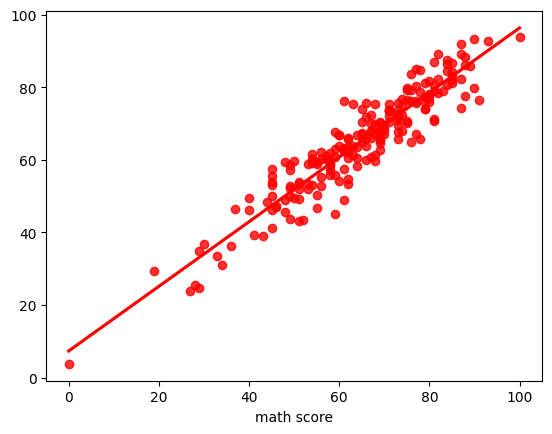

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

### Difference between Actual and Predicted Values

In [30]:
pred_df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
